<font size="5">Tarea 4: Felipe Conejeros y Mabel González</font>

## Pregunta 1
A continuación se ingresa la base de datos y se realizan los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Además, se identifican los tipos de datos, se realizan estadisticas descriptivas sobre las variables importantes y se hace una limpieza de las variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

import math

%matplotlib inline

In [2]:
#Base de datos
junaeb2 = pd.read_csv('../Tarea 4/junaeb2.csv')
#junaeb2.describe()

In [3]:
junaeb2.dtypes

sexo            int64
edad            int64
imce          float64
vive_padre      int64
vive_madre      int64
sk1             int64
sk2             int64
sk3             int64
sk4             int64
sk5             int64
sk6             int64
sk7             int64
sk8             int64
sk9             int64
sk10            int64
sk11            int64
sk12            int64
sk13            int64
act_fisica    float64
area            int64
educm         float64
educp           int64
madre_work      int64
dtype: object

In [4]:
sexo_alt = []
for i in range(len(junaeb2)):
    if junaeb2["sexo"][i] not in sexo_alt:
        sexo_alt.append(junaeb2["sexo"][i])
print("sexo", sexo_alt)

vive_padre_alt = []
for i in range(len(junaeb2)):
    if junaeb2["vive_padre"][i] not in vive_padre_alt:
        vive_padre_alt.append(junaeb2["vive_padre"][i])
print("vive_padre", vive_padre_alt)

vive_madre_alt = []
for i in range(len(junaeb2)):
    if junaeb2["vive_madre"][i] not in vive_madre_alt:
        vive_madre_alt.append(junaeb2["vive_madre"][i])
print("vive_madre", vive_madre_alt)


area_alt = []
for i in range(len(junaeb2)):
    if junaeb2["area"][i] not in area_alt:
        area_alt.append(junaeb2["area"][i])
print("area", area_alt)

madre_work_alt = []
for i in range(len(junaeb2)):
    if junaeb2["madre_work"][i] not in madre_work_alt:
        madre_work_alt.append(junaeb2["madre_work"][i])
print("madre_work", madre_work_alt)

act_fisica_alt = []
for i in range(len(junaeb2)):
    if junaeb2["act_fisica"][i] not in act_fisica_alt:
        act_fisica_alt.append(junaeb2["act_fisica"][i])
print("act_fisica", act_fisica_alt)

educm_alt = []
for i in range(len(junaeb2)):
    if junaeb2["educm"][i] not in educm_alt:
        educm_alt.append(junaeb2["educm"][i])
print("educm", educm_alt)

sexo [1, 0]
vive_padre [1, 0, 2]
vive_madre [1, 0, 2]
area [0, 1]
madre_work [-1, 1, 0]
act_fisica [nan, 5.0, nan, 2.0, 1.0, 4.0, 3.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

educm [11.0, 8.0, 13.0, 16.0, 17.0, 20.0, 10.0, 6.0, 9.0, 12.0, 7.0, 4.0, 15.0, 19.0, 18.0, 0.0, 5.0, 3.0, nan, 22.0, nan, nan, nan, nan, nan, 14.0, nan, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [5]:
k = 0
for i in range(len(junaeb2)):
    if math.isnan(junaeb2["act_fisica"][i]) == True:
        k += 1
print("Se debe borrar", k, "nan")

Se debe borrar 1966 nan


In [6]:
k = 0
for i in range(len(junaeb2)):
    if math.isnan(junaeb2["educm"][i]) == True:
        k += 1
print("Se debe borrar", k, "nan")

Se debe borrar 721 nan


Se observa que vive_padre y vive_madre son variables binarias, sin embargo, en las observaciones se tienen respuestas 1, 0 y 2 por lo que se eliminan los datos con valor 2. 

In [7]:
vive_madre_suma = []
for i in range(len(vive_madre_alt)):
    k = 0
    for j in range(len(junaeb2)):
        if junaeb2["vive_madre"][j] == vive_madre_alt[i]:
            k += 1
    vive_madre_suma.append(k)
vive_madre_suma

[57826, 2082, 91]

In [8]:
vive_padre_suma = []
for i in range(len(vive_padre_alt)):
    k = 0
    for j in range(len(junaeb2)):
        if junaeb2["vive_padre"][j] == vive_padre_alt[i]:
            k += 1
    vive_padre_suma.append(k)
vive_padre_suma

[43278, 16698, 23]

Luego, dado que la variable sk7 corresponde a una pregunta negativa (al contrario que las demás), se modificarán las observaciones de tal manera que:\
1 = 5\
2 = 4\
3 = 3

In [9]:
sk7 = []
for i in range(len(junaeb2)):
    sk7.append(junaeb2["sk7"][i])

In [10]:
for i in range(len(sk7)):
    if sk7[i] == 1:
        sk7[i] = 5
    elif sk7[i] == 2:
        sk7[i] = 4
    elif sk7[i] == 4:
        sk7[i] = 2
    elif sk7[i] == 5:
        sk7[i] = 1

In [11]:
junaeb2["sk7"] = sk7

In [12]:
# se procede a borrar las 91 y 23 observaciones correspondientes a 2, tanto para vive_madre y vive_padre

junaeb2_index_1 = junaeb2[junaeb2["vive_madre"] == 2].index
junaeb2 = junaeb2.drop(junaeb2_index_1)

junaeb2_index_1 = junaeb2[junaeb2["vive_padre"] == 2].index
junaeb2 = junaeb2.drop(junaeb2_index_1)

In [13]:
junaeb2.describe()

,sexo,edad,imce,vive_padre,vive_madre,sk1,sk2,sk3,sk4,sk5,...,sk9,sk10,sk11,sk12,sk13,act_fisica,area,educm,educp,madre_work
count,59885.000000,59885.00000,59885.000000,59885.000000,59885.000000,59885.000000,59885.000000,59885.000000,59885.000000,59885.000000,...,59885.000000,59885.000000,59885.000000,59885.000000,59885.000000,57922.000000,59885.000000,59165.000000,59885.000000,59885.000000
mean,0.534992,81.91978,1.017765,0.721683,0.965551,1.111731,1.390682,1.260299,1.253352,1.267813,...,1.331135,1.855406,1.384170,1.497003,1.691242,2.559753,0.906755,13.046463,12.943609,0.088937
std,0.498778,3.81653,1.367962,0.448174,0.182382,0.390792,0.654514,0.583895,0.574491,0.566422,...,0.664088,0.941610,0.669026,0.797208,0.984356,1.070258,0.290778,3.328674,3.429180,0.942739
min,0.000000,62.00000,-5.020000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,80.00000,0.110000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.000000,11.000000,-1.000000
50%,1.000000,81.00000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,13.000000,13.000000,0.000000
75%,1.000000,83.00000,1.930000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,14.000000,1.000000
max,1.000000,107.00000,5.040000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,22.000000,22.000000,1.000000


In [14]:
# Borrando los nan
junaeb2.dropna(inplace=True) #borra los na (primera limpieza)
junaeb2.describe()

,sexo,edad,imce,vive_padre,vive_madre,sk1,sk2,sk3,sk4,sk5,...,sk9,sk10,sk11,sk12,sk13,act_fisica,area,educm,educp,madre_work
count,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.00000,57247.000000,...,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000
mean,0.535207,81.880361,1.018248,0.721086,0.975213,1.106434,1.385575,1.253463,1.24686,1.263682,...,1.322707,1.845756,1.376893,1.489213,1.683162,2.559663,0.907157,13.084092,12.988855,0.102521
std,0.498763,3.769133,1.367567,0.448469,0.155478,0.375705,0.646386,0.572004,0.56263,0.558256,...,0.651930,0.933075,0.658222,0.786763,0.977324,1.070433,0.290215,3.321023,3.420104,0.941047
min,0.000000,62.000000,-5.020000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,80.000000,0.110000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.000000,11.000000,-1.000000
50%,1.000000,81.000000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,13.000000,13.000000,0.000000
75%,1.000000,83.000000,1.930000,1.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,14.000000,1.000000
max,1.000000,107.000000,5.040000,1.000000,1.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,22.000000,22.000000,1.000000


In [15]:
junaeb2.dtypes

sexo            int64
edad            int64
imce          float64
vive_padre      int64
vive_madre      int64
sk1             int64
sk2             int64
sk3             int64
sk4             int64
sk5             int64
sk6             int64
sk7             int64
sk8             int64
sk9             int64
sk10            int64
sk11            int64
sk12            int64
sk13            int64
act_fisica    float64
area            int64
educm         float64
educp           int64
madre_work      int64
dtype: object

In [16]:
junaeb2.value_counts("sexo")

sexo
1    30639
0    26608
dtype: int64

<AxesSubplot:xlabel='edad', ylabel='Count'>

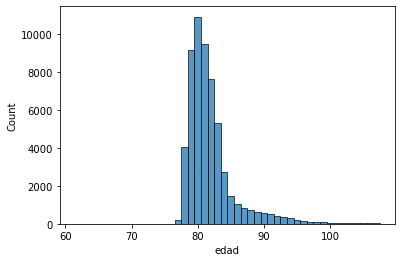

In [17]:
sns.histplot(junaeb2, x = "edad", discrete=True)

Del gráfico anterior se observa una posible distribución Poisson para la variable "edad"

<AxesSubplot:xlabel='imce', ylabel='Count'>

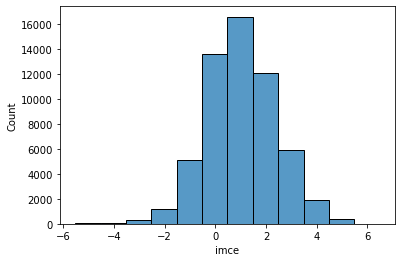

In [18]:
sns.histplot(junaeb2, x = "imce", discrete=True)

Para la variable "imce" se tiene una distribución normal.

<AxesSubplot:xlabel='act_fisica', ylabel='Count'>

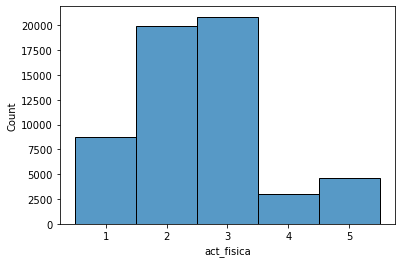

In [19]:
sns.histplot(junaeb2, x = "act_fisica", discrete=True)

educm
13.0    24734
9.0      4872
15.0     3505
11.0     3411
16.0     3182
18.0     3113
17.0     2982
12.0     1884
10.0     1825
14.0     1407
20.0     1124
22.0     1014
7.0       977
8.0       946
6.0       570
5.0       547
19.0      418
4.0       311
3.0       203
0.0       123
2.0        99
dtype: int64

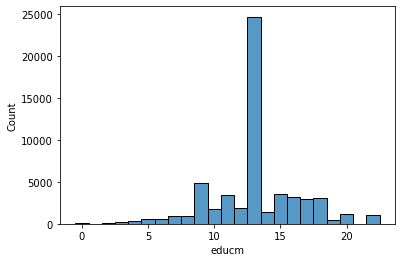

In [20]:
sns.histplot(junaeb2, x = "educm", discrete=True)
junaeb2.value_counts("educm")

De lo anterior, se observa que la mayor cantidad de observaciones tiene padres con 13 años de escolaridad.

<AxesSubplot:>

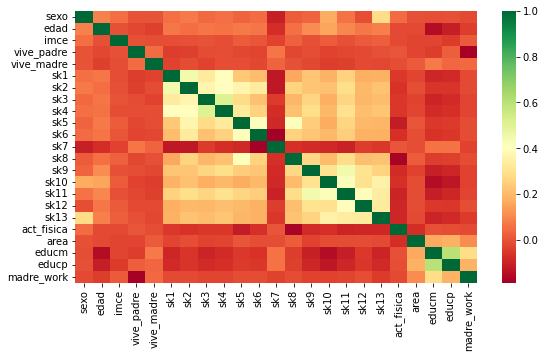

In [21]:
plt.figure(figsize = (9,5))

sns.heatmap(junaeb2.corr(), cmap='RdYlGn') #mapa de correlaciones entre las variables

#La primera variable tiene la menor correlación con los demás
#4 está correlacionada negativamente con casi todo

En el gráfico anterior se puede observar el mapa de correlaciones entre las variables. Donde destaca que la mayoría de las correlaciones son negativas.

## Pregunta 2

## PCA

A continuación se realiza un PCA para las variables sk1 a sk13 considerando 12 componentes, de donde se obtiene la proporción de la varianza que aporta cada uno de ellos.

In [22]:
var_sk = junaeb2[["sk1","sk2","sk3","sk4","sk5","sk6","sk7","sk8","sk9","sk10","sk11","sk12","sk13"]]
pca = PCA(n_components=12)
pca_features = pca.fit_transform(var_sk)
print(pca.explained_variance_ratio_)

[0.28631517 0.18770494 0.10021277 0.07934442 0.06652185 0.0639139
 0.05177581 0.04378728 0.03246161 0.02948488 0.02484987 0.02097694]


Luego, se genera un Scree plot que muestra la proporción de varianza explicada por cada componente de donde se obtiene que todos los componentes explican la totalidad de la varianza, lo que indica que es posible representar a la data utilizando los 12 componentes. 

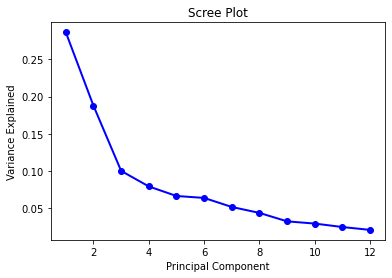

In [23]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

También podemos usar "mle" para determinar el numero óptimo de componentes basados en la varianza de la data, al ser un método que se detiene cuando el factor adicional ya no está entregando información. De esto se obtiene que el número óptimo de componentes es 12, y se muestra la proporción de la varianza explicada por cada uno. 

In [24]:
pca = PCA(n_components='mle')
pca_features = pca.fit_transform(var_sk)
print(pca.explained_variance_ratio_)

[0.28631517 0.18770494 0.10021277 0.07934442 0.06652185 0.0639139
 0.05177581 0.04378728 0.03246161 0.02948488 0.02484987 0.02097694]


A continuación podemos ver los pesos relativos que indican cómo se relaciona cada variable con los factores.

In [25]:
#Da información acerca de en que dirección se están moviendo los componentes.
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.104227,0.229226,0.169553,0.185690,0.185365,0.252092,-0.341069,0.292371,0.240676,0.405647,0.288246,0.292983,0.426902
1,0.007044,0.030471,0.062588,0.053250,0.039207,-0.031085,0.926760,0.099293,0.085301,0.164018,0.100167,0.152525,0.231400
2,0.083509,0.267293,0.183524,0.190825,0.297595,0.334215,0.114564,0.477934,0.078417,-0.389646,-0.000952,-0.090333,-0.493500
3,0.001749,-0.023801,-0.032407,-0.027100,-0.043243,0.003667,0.035749,-0.096266,0.102175,0.698603,0.144628,0.016523,-0.682305
4,0.151165,0.289807,0.313649,0.305867,-0.016091,0.174138,0.037738,-0.755708,0.088409,-0.183365,0.090231,0.206599,-0.076589


La descripción de cada factor se muestra a continuación. 

In [26]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', "PC8", "PC9", 'PC10', 'PC11', 'PC12']) #cambiar segun cuantos factores sean
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
count,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000,57247.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.467,1.188,0.868,0.772,0.707,0.693,0.624,0.574,0.494,0.471,0.432,0.397
min,-1.903,-3.219,-4.117,-3.464,-3.921,-3.932,-4.605,-4.377,-4.206,-3.557,-2.454,-3.108
25%,-1.092,-0.724,-0.470,-0.245,-0.293,-0.400,-0.313,-0.289,-0.213,-0.192,-0.218,-0.056
50%,-0.270,0.187,0.006,-0.090,0.095,0.032,0.063,0.027,-0.019,0.040,0.049,0.020
75%,0.786,0.814,0.454,0.516,0.339,0.273,0.312,0.196,0.206,0.119,0.114,0.041
max,10.919,4.589,6.316,3.692,5.210,4.580,4.675,5.228,4.463,3.788,3.833,3.286


Luego, realizamos un check de que todos los vectores son ortogonales, es decir, que no hay correlación entre ellos, lo que si se cumple. 

In [27]:
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PC1,1.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
PC2,0.000,1.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000
PC3,-0.000,-0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000
PC4,0.000,-0.000,-0.000,1.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
PC5,-0.000,-0.000,-0.000,-0.000,1.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
PC6,0.000,-0.000,0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
PC7,-0.000,0.000,0.000,0.000,-0.000,-0.000,1.000,0.000,-0.000,0.000,-0.000,-0.000
PC8,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000
PC9,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,1.000,-0.000,0.000,0.000
PC10,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,1.000,-0.000,-0.000


## Pregunta 3
A continuación, se presenta un Scatterplot para los primeros 3 componentes principales contra las variables: sexo, area, madre_work y act_fisica, con el fin de saber si existen diferencias significativas entre grupos. De manera general, se puede observar que no existen diferencias significativas entre grupos ya que no se observa una marcada separación entre ellos en relación a ambos ejes.

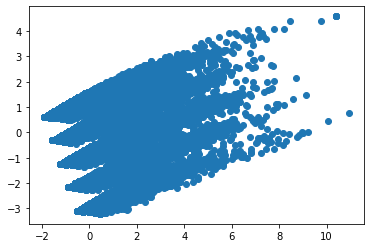

In [57]:
plt.scatter(pca_df['PC1'],pca_df['PC2'])

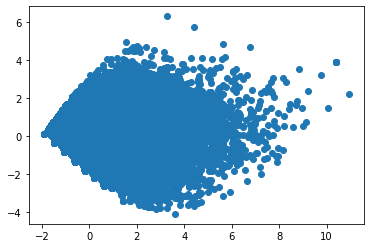

In [58]:
plt.scatter(pca_df['PC1'],pca_df['PC3'])

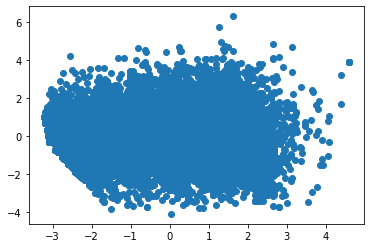

In [59]:
plt.scatter(pca_df['PC2'],pca_df['PC3'])

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

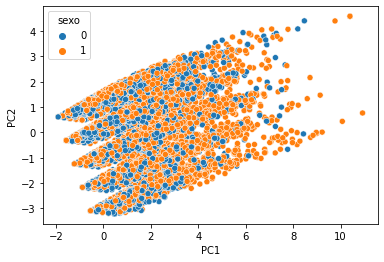

In [60]:
a = "sexo"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC3'>

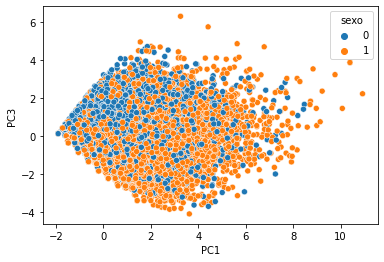

In [62]:
a = "sexo"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC2', ylabel='PC3'>

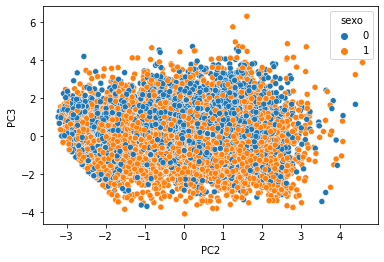

In [63]:
a = "sexo"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC2', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

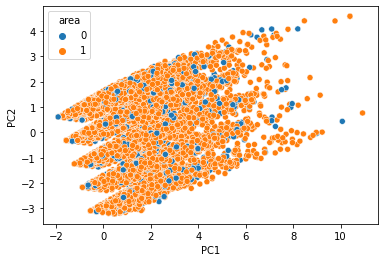

In [64]:
a = "area"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC3'>

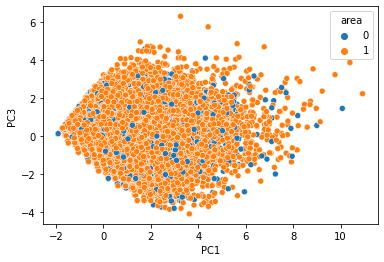

In [65]:
a = "area"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC2', ylabel='PC3'>

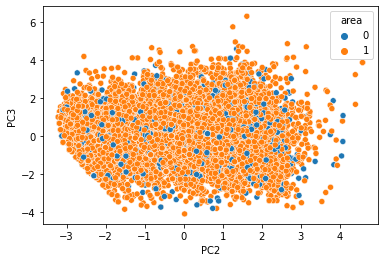

In [66]:
a = "area"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC2', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

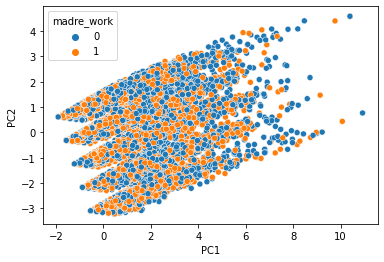

In [67]:
a = "madre_work"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC3'>

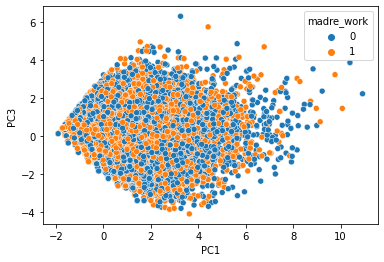

In [68]:
a = "madre_work"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC1', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC2', ylabel='PC3'>

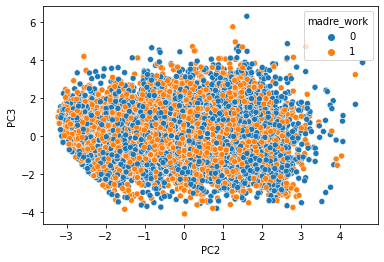

In [69]:
a = "madre_work"
pca_df[a] = 0
pca_df[a] = np.where(junaeb2[a] > 0, 1, pca_df[a])
sns.scatterplot('PC2', 'PC3', data=pca_df, hue=a)

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

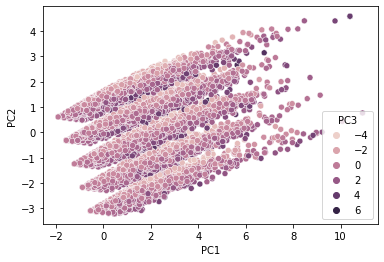

In [71]:
pca_df['act_fisica'] = junaeb2['act_fisica'] 
sns.scatterplot('PC1', 'PC2', 'PC3', data=pca_df, hue='act_fisica')

## Pregunta 4

## EFA: análisis factorial exploratorio

Análisis factorial separa cada variable observada en 2 elementos: variable latente+ruido.
Usando la libreria semopy podemos inferir que variables corresponden a cada factor, basado en los "factor loadings" estimados.

Semopy levanta factores distintos que factor-analyser. La diferencia es dado que factor_analyser reporta factores hasta que los eigenvalores son irrelevantes (varianza explicada), mientras que semopy presenta un potencial EFA donde todos los coeficientes son estadisticamente significativos.

In [33]:
fa = FactorAnalyzer(rotation='promax')
fa.fit(var_sk)

FactorAnalyzer(rotation_kwargs={})

Se determinó automaticamente que el número óptimo de componentes es 3, y a continuación se muestra un arreglo con los pesos relativos para cada variable.

In [34]:
#Indica que factores pesan y en que dirección
fa.loadings_

array([[ 0.01513617,  0.60642246, -0.03745664],
       [-0.03621966,  0.49631702,  0.23113834],
       [ 0.02425043,  0.64625691, -0.04354572],
       [ 0.00349246,  0.7396996 , -0.03312391],
       [-0.14810408, -0.02621475,  0.862476  ],
       [ 0.00590849,  0.04188805,  0.51846545],
       [-0.01588018, -0.03990937, -0.13987395],
       [ 0.14617103, -0.10754942,  0.51519416],
       [ 0.48366606,  0.08146774,  0.05186671],
       [ 0.6196176 , -0.03468374, -0.03260352],
       [ 0.696416  ,  0.03005479,  0.00609085],
       [ 0.56966766, -0.02274258, -0.00423132],
       [ 0.52730608,  0.01921561, -0.01143569]])

In [35]:
#a pesar de que estima 3 factores se calculan todos los eigenvalues
fa.get_eigenvalues()

(array([4.01421272, 1.35598674, 1.10382041, 0.99901701, 0.78245204,
        0.71417333, 0.70607397, 0.69653413, 0.60998972, 0.52854767,
        0.51665716, 0.49900826, 0.47352684]),
 array([ 3.41985323,  0.76542641,  0.5925844 ,  0.20923866,  0.08734352,
         0.06289151,  0.03437131,  0.02794699, -0.02552849, -0.07612027,
        -0.09466115, -0.1133073 , -0.17534796]))

Luego, en el Scree plot se observa la proporción de varianza que aporta cada componente.

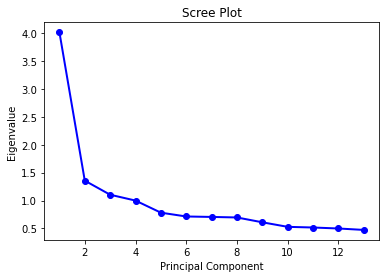

In [36]:
values = np.arange(1,14)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [37]:
#matriz de varianza-covarianza
#3 elementos: 
#-varianza de forma cruda
#-proporcion explicada de cada factor
#-proporción acumulada

fa.get_factor_variance()

(array([1.75115614, 1.60411344, 1.35942129]),
 array([0.13470432, 0.12339334, 0.10457087]),
 array([0.13470432, 0.25809766, 0.36266853]))

Usando semopy se obtiene la aproximación de la representación del modelo, que representa la relación entre un factor latente y las variables observadas. 

In [38]:
print(semopy.efa.explore_cfa_model(var_sk, pval=0.05))

eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk6 + sk7
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13



Se obtienen 4 factores, donde se observa que algunos tienen variables repetidas como: sk11, sk9, sk12 y sk6.
Para decidir en que factor se consideran se observa la matriz de pesos relativos con el fin de que cada variable sea representada por solo un factor, obteniendo finalmente el siguiente modelo:

* eta1 =~ sk11 + sk9 + sk10 + sk12
* eta2 =~ sk7
* eta3 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk6 + sk8
* eta4 =~ sk13

In [39]:
pca_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.104227,0.229226,0.169553,0.185690,0.185365,0.252092,-0.341069,0.292371,0.240676,0.405647,0.288246,0.292983,0.426902
1,0.007044,0.030471,0.062588,0.053250,0.039207,-0.031085,0.926760,0.099293,0.085301,0.164018,0.100167,0.152525,0.231400
2,0.083509,0.267293,0.183524,0.190825,0.297595,0.334215,0.114564,0.477934,0.078417,-0.389646,-0.000952,-0.090333,-0.493500
3,0.001749,-0.023801,-0.032407,-0.027100,-0.043243,0.003667,0.035749,-0.096266,0.102175,0.698603,0.144628,0.016523,-0.682305
4,0.151165,0.289807,0.313649,0.305867,-0.016091,0.174138,0.037738,-0.755708,0.088409,-0.183365,0.090231,0.206599,-0.076589
5,-0.057114,-0.216727,-0.098264,-0.105001,-0.083733,-0.263827,-0.059367,0.115752,0.188724,-0.297210,0.189738,0.793078,-0.215925
6,0.124646,0.162650,0.327192,0.283990,-0.108956,-0.771862,-0.062113,0.138290,0.231358,-0.025626,0.126137,-0.262750,-0.023401
7,-0.081896,-0.355100,-0.098948,-0.093933,-0.051283,0.215499,0.019558,-0.113267,0.717545,-0.169018,0.345582,-0.348909,0.041222
8,0.072986,0.634788,-0.486450,-0.346262,-0.010628,-0.107930,0.023817,-0.058713,-0.050163,-0.105560,0.445009,-0.087842,0.001135
9,-0.038693,-0.336875,0.189905,0.135432,0.020610,0.045434,-0.001248,0.016876,-0.550041,-0.074429,0.712220,-0.110550,-0.016539


## Pregunta 5

## General CFA: análisis factorial confirmatorio

Basandose en los resultados de EFA implementamos CFA usando la libreria semopy.

In [40]:
Xf = var_sk

mod = """
# measurement model
eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk7 
eta3 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk6 + sk8 
eta4 =~ sk13
    """

model = semopy.Model(mod) #se entrega el modelo
out=model.fit(Xf) 
print(out)

#output
#tipo de función utilizada 
#algoritmo de optimización
#valor final de la función
#numero de iteraciones
#parametros igual a los pesos relativos
#para cada factor hay un parametro estimado


Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.304
Number of iterations: 35
Params: 0.796 1.091 0.892 1.153 0.871 0.913 0.566 0.981 1.009 0.279 0.435 0.240 0.183 0.596 1.083 0.211 0.203 0.216 0.406 0.098 0.691 0.553 0.133 -0.076 0.114 0.124 0.394 -0.075 -0.063 0.264 0.231 0.240


Se asigna un nombre a cada factor que representa el concepto comun entre todas las variables:
* eta1: curiosidad
* eta2: agresividad
* eta3: inteligencia emocional
* eta4: expresividad artística

In [41]:
#filas 1-12: pesos relativos
#filas 13-15: matriz de varianza-covarianza entre factores
#filas 16-23: variación residual de las variables (que tan bien explicada esta la variable dentro del modelo, menor valor mejor ajuste)
#permite decidir como representar el modelo, que variables incluir si son significativas 

a = model.inspect(mode='list', what="names", std_est=True)

In [42]:
imp_medida = a.iloc[:13]
imp_medida

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,sk11,~,eta1,1.000000,0.729736,-,-,-
1,sk9,~,eta1,0.796446,0.586830,0.006923,115.048315,0.0
2,sk10,~,eta1,1.091185,0.561724,0.009833,110.972999,0.0
3,sk12,~,eta1,0.892402,0.544866,0.008252,108.141334,0.0
4,sk7,~,eta2,1.000000,0.516651,-,-,-
5,sk4,~,eta3,1.000000,0.648956,-,-,-
6,sk2,~,eta3,1.153444,0.651519,0.009435,122.246019,0.0
7,sk5,~,eta3,0.870811,0.569520,0.007895,110.304864,0.0
8,sk3,~,eta3,0.913081,0.582814,0.008127,112.351822,0.0
9,sk1,~,eta3,0.565921,0.549963,0.005278,107.226906,0.0


Importancia mayor de cada medida (variable) a cada factor:
* eta1 -> sk11
* eta2 -> sk7
* eta3 -> sk4
* eta4 -> sk13

In [43]:
cor_medida = a.iloc[13:23]
cor_medida

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
13,eta3,~~,eta3,0.133305,1.000000,0.001711,77.888282,0.0
14,eta3,~~,eta2,-0.075760,-0.330442,0.002165,-34.994302,0.0
15,eta3,~~,eta1,0.113780,0.648779,0.001308,86.975575,0.0
16,eta3,~~,eta4,0.124418,0.663524,0.001883,66.074602,0.0
17,eta2,~~,eta2,0.394318,1.000000,0.004366,90.32026,0.0
18,eta2,~~,eta1,-0.074914,-0.248365,0.00291,-25.745546,0.0
19,eta2,~~,eta4,-0.062521,-0.193863,0.004971,-12.576205,0.0
20,eta4,~~,eta4,0.263761,1.000000,0.002823,93.444966,0.0
21,eta1,~~,eta1,0.230724,1.000000,0.002665,86.567892,0.0
22,eta1,~~,eta4,0.240409,0.974539,0.002678,89.769007,0.0


La tabla anterior muestra la varianza-covarianza entre factores

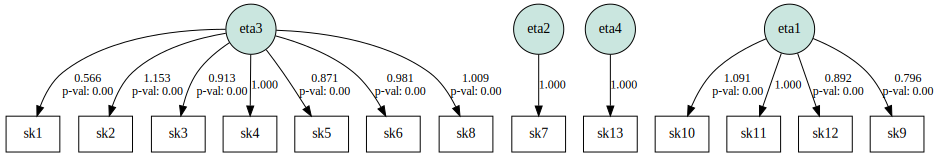

In [44]:
#Representación gráfica:
semopy.semplot(model, "model.png")

## Pregunta 6

## Complete SEM example

In [45]:
cor_act_fisica = junaeb2.corr().apply(lambda s: s.apply('{0:.3f}'.format))
cor_act_fisica["act_fisica"]

sexo           0.047
edad          -0.017
imce          -0.020
vive_padre     0.006
vive_madre    -0.010
sk1           -0.051
sk2           -0.064
sk3           -0.053
sk4           -0.054
sk5           -0.114
sk6           -0.068
sk7            0.005
sk8           -0.175
sk9           -0.077
sk10          -0.068
sk11          -0.098
sk12          -0.089
sk13          -0.092
act_fisica     1.000
area          -0.071
educm         -0.004
educp         -0.010
madre_work    -0.019
Name: act_fisica, dtype: object

Se considerarán las variables que mantengan una correlación mayor con act_fisica de 0.02 y menor a -0.02, por lo que se incluirán las variables sexo, imce y area.

In [46]:
# incluyendo imce, act_fisica y area
var_sk["sexo"] = junaeb2["sexo"]
var_sk["imce"] = junaeb2["imce"]
var_sk["act_fisica"] = junaeb2["act_fisica"]
var_sk["area"] = junaeb2["area"]

<ipython-input-46-269e1b52e53d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_sk["sexo"] = junaeb2["sexo"]
<ipython-input-46-269e1b52e53d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_sk["imce"] = junaeb2["imce"]
<ipython-input-46-269e1b52e53d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [47]:
var_sk

,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,sk9,sk10,sk11,sk12,sk13,sexo,imce,act_fisica,area
1,1,1,1,1,1,1,2,1,1,1,1,1,1,0,0.71,5.0,0
3,1,1,1,1,1,1,4,1,1,1,1,1,1,1,2.05,2.0,1
4,1,1,1,1,1,1,3,1,1,1,1,1,1,0,1.05,1.0,1
5,1,2,1,1,1,1,2,1,1,1,1,1,1,0,1.39,4.0,0
6,1,1,1,2,2,2,3,2,3,3,3,2,2,1,2.75,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,1,3,1,2,2,1,5,3,2,2,2,1,1,0,1.63,2.0,1
59995,1,1,2,2,1,1,5,2,1,3,2,1,4,1,2.57,3.0,1
59996,1,1,1,1,1,1,5,1,1,3,1,1,1,0,2.12,3.0,1
59997,1,1,1,1,2,2,5,2,1,2,1,1,2,1,-0.43,2.0,1


In [48]:
import semopy
import pandas as pd
mod = """
# measurement model
eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk7 
eta3 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk6 + sk8 
eta4 =~ sk13
    """
desc = mod
data = var_sk
mod = semopy.Model(desc)
res = mod.fit(data)
print(mod.inspect())

    lval  op  rval  Estimate  Std. Err     z-value p-value
0   sk11   ~  eta1  1.000000         -           -       -
1    sk9   ~  eta1  0.796446  0.006923  115.048315     0.0
2   sk10   ~  eta1  1.091185  0.009833  110.972999     0.0
3   sk12   ~  eta1  0.892402  0.008252  108.141334     0.0
4    sk7   ~  eta2  1.000000         -           -       -
5    sk4   ~  eta3  1.000000         -           -       -
6    sk2   ~  eta3  1.153444  0.009435  122.246019     0.0
7    sk5   ~  eta3  0.870811  0.007895  110.304864     0.0
8    sk3   ~  eta3  0.913081  0.008127  112.351822     0.0
9    sk1   ~  eta3  0.565921  0.005278  107.226906     0.0
10   sk6   ~  eta3  0.980967  0.010076   97.358183     0.0
11   sk8   ~  eta3  1.009180  0.011296   89.335968     0.0
12  sk13   ~  eta4  1.000000         -           -       -
13  eta3  ~~  eta3  0.133305  0.001711   77.888282     0.0
14  eta3  ~~  eta2 -0.075760  0.002165  -34.994302     0.0
15  eta3  ~~  eta1  0.113780  0.001308   86.975575     0

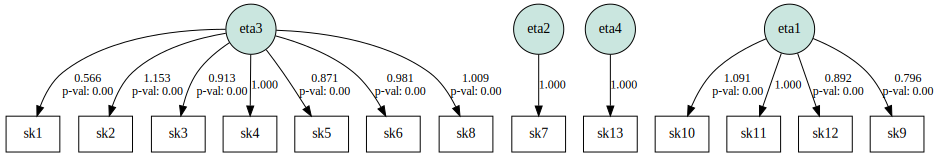

In [49]:
semopy.semplot(mod, "semmodel.png")

Ejemplo SEM considerando la parte de medidas y la parte estructural en semopy (data y modelo entregada en https://semopy.com/tutorial.html). Este ejemplo presenta un modelo donde 3 factories son estimados para la data, donde cada medida corresponde a solo 1 factor. La primera parte del modelo se muestra en la sección 6 (medidas solamente). La segunda parte (regresiones) entrega las relaciones estructurales entre los factores, y la última parte entrega las poteniales correlaciones entre el error en cada medida (esto se puede usar en la sección 6 para mejorar el modelo final).

<font size="3">**Tarea 4**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* el dia 6/12 hasta las 21:00. Utilizar la base de datos *junaeb2.csv*. La base corresponde a observaciones tomadas de estudiantes de colegio. Las variables tienen la siguiente descripcion:

*sk1-sk13 se usan para el análisis factorial. 

- sexo: sexo del estudiante
- edad: edad del estudiante (meses)
- imce: indice de masa corporal estandarizado
- vive_padre: si el padre vive en el hogar
- vive_madre: si la madre vive en el hogar
- area: urbana=1, rural=0
- sk1: muestra afecto a padres (1: siempre - 5: nunca)
- sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
- sk3: expresa sus sentimientos (1: siempre - 5: nunca)
- sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)
- sk5: juega con otros (1: siempre - 5: nunca)
- sk6: comparte sus cosas con otros (1: siempre - 5: nunca)
- sk7: es agresivo (1: siempre - 5: nunca)
- sk8: participa en juegos grupales (1: siempre - 5: nunca)
- sk9: hace preguntas a adultos (1: siempre - 5: nunca) 
- sk10: tiene interes por libros (1: siempre - 5: nunca) 
- sk11: tiene interes por su entorno (1: siempre - 5: nunca)
- sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca) 
- sk13: tiene expresiones artisticas (1: siempre - 5: nunca) 
- act_fisica: frecuencia actividad fisica (1: nunca - 5: 5 o mas veces a la semana)
- educm: años de escolaridad de la madre
- educp: años de escolaridad del padre
- madre_work: si la madre trabaja (-1: labor domestica, 0: desempleada, 1: empleada)

Preguntas:

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados? (gráfico de puntitos)

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores. (solo la parte de medida)

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados? 

(Con las medidas se generan los factores, y los factores predicen un resultado y además usan otras variables asociadas a los factores). Incluir otras var que puedan influir en la actividad física (ej: escolaridad puede explicar la var resultado de actividad fisica como los factores). 
Numero de regresiones: una para cada factor y una para la var resultado. 
No es necesario declarar las correlaciones residuales.
Interpretación: los factores afectan la actividad fisica o no, cambia si se agregan var independientes?, dar nombre a los factores (que podría representar?)